In [38]:
#Import all the tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report 
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

Load Data

In [39]:
df = pd.read_csv("heart-disease.csv")

In [40]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data Exploration
The goal is here is to find out more about the data and become a subject matter export on the dataset you're working with.
1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers andwhy should you care about them?
5. How can you add, change and remove features to get more out of your data?



In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [42]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [43]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [44]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


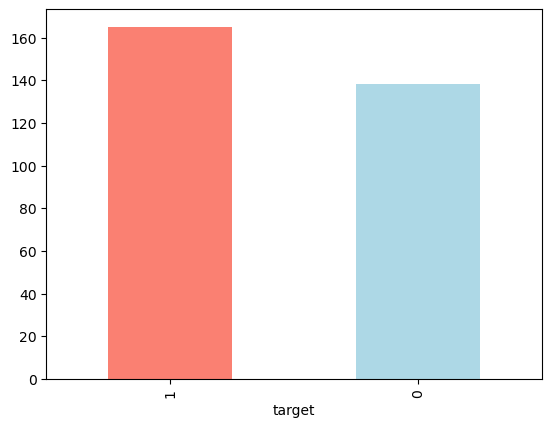

In [45]:
df.target.value_counts().plot(kind="bar",color=["salmon","lightblue"]);

Heart Disease Frequency according to sex


In [46]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [47]:
#Comapre target column with sex column

pd.crosstab(df.target , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


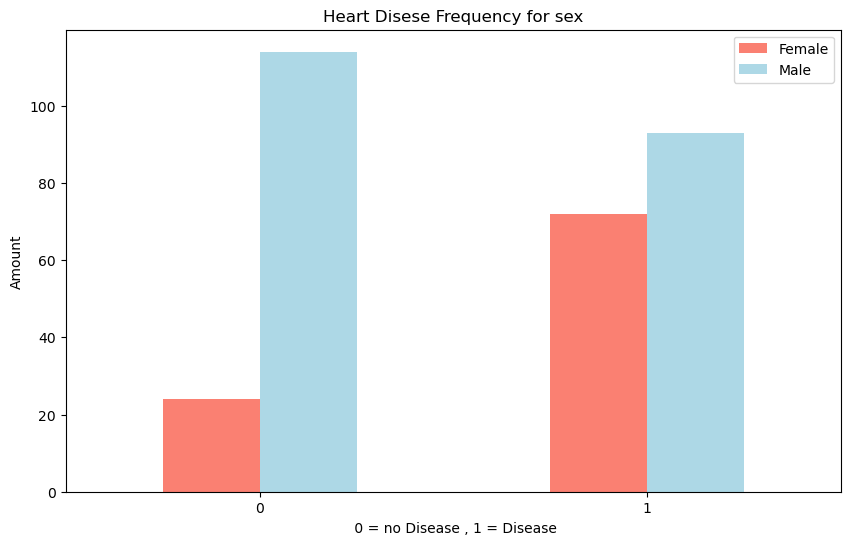

In [48]:
#Create a plot of crosstab

pd.crosstab(df.target , df.sex).plot(kind="bar" , color = ["salmon" , "lightblue"] , figsize=(10,6))
plt.title("Heart Disese Frequency for sex") 
plt.xlabel(" 0 = no Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female" , "Male"])
plt.xticks(rotation=0);

Age vs. Max Heart Rate for Heart Disease

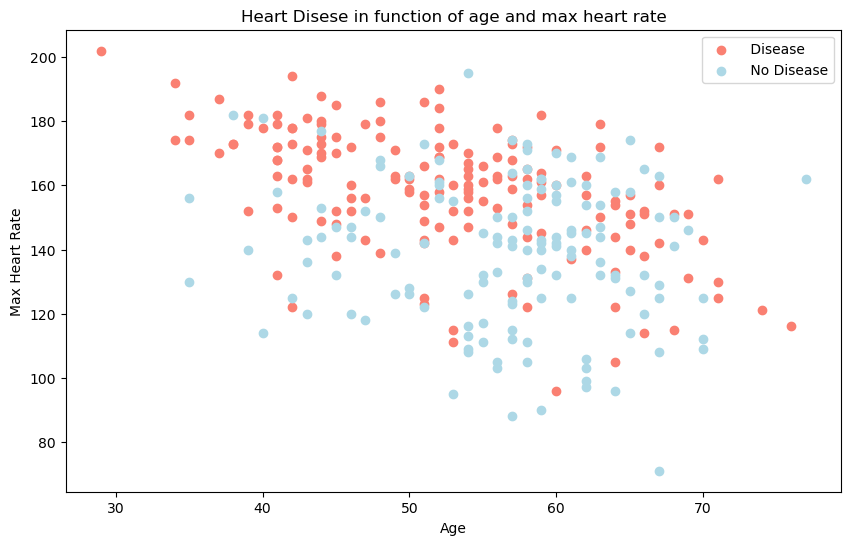

In [49]:
#Create another figure
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c= "salmon")

#Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c= "lightblue")

plt.title("Heart Disese in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend([" Disease"," No Disease"])
plt.xticks;

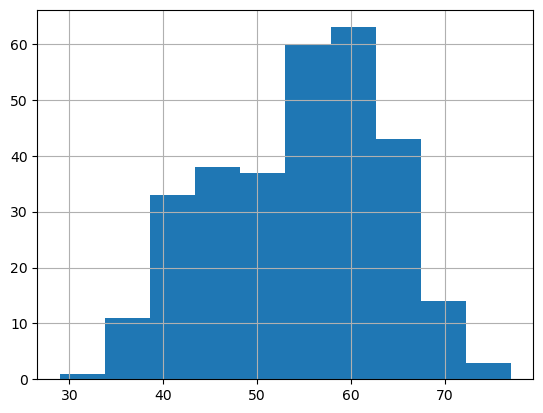

In [50]:
#Check the age column with the histogram
df.age.hist();


Heart Disease frequency with chest pain

In [51]:
pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


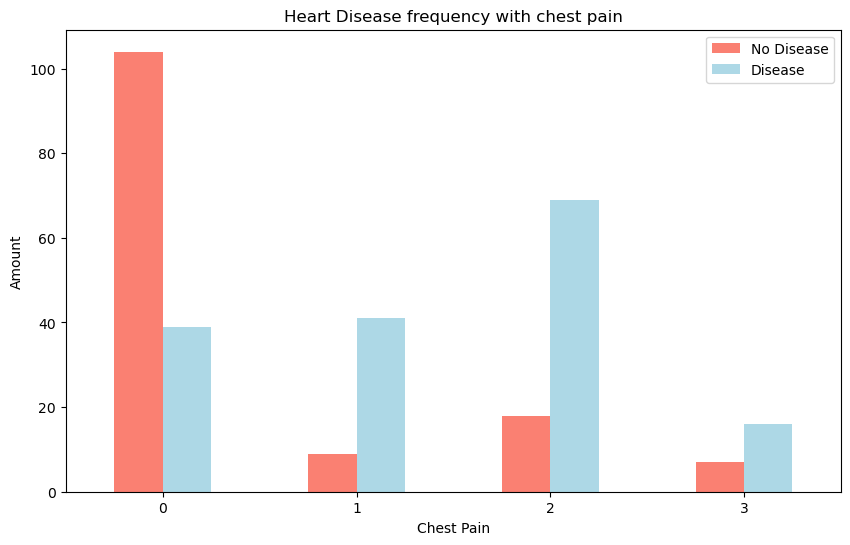

In [52]:
#Make the chest more visual
pd.crosstab(df.cp, df.target).plot(kind="bar" , figsize=(10,6), color = ["salmon" ,"lightblue"])
plt.title("Heart Disease frequency with chest pain")
plt.xlabel("Chest Pain")
plt.ylabel("Amount")
plt.legend(["No Disease" , "Disease"])
plt.xticks(rotation=0);

In [53]:
#Make correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


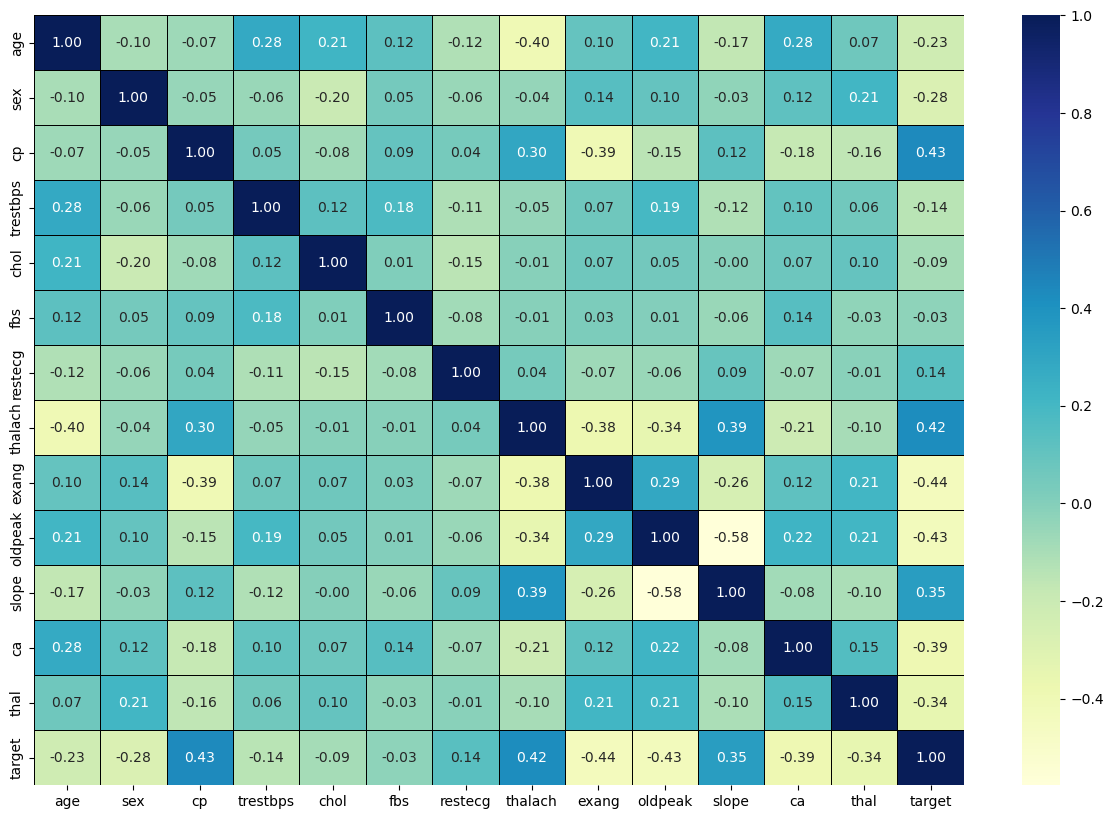

In [54]:
#Make correlation more visual

corr_matrix = df.corr()
fig , ax = plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix, annot= True,cmap='YlGnBu',fmt = ".2f" , linewidths=0.5,linecolor="black")

In [55]:
#Split data into x and y
X= df.drop("target" , axis=1)
y=df.target

In [56]:
#Set random seed
np.random.seed(42)

#Split data into train and test sets

X_train , X_test , y_train, y_test = train_test_split(X,y, test_size=0.2)

Now we've got our data spliting into training and test sets, it's time to buid a machine learning model.
We are going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
4. RandomForest Classifier


In [57]:
#Put models in the dictionary
models ={ "Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest Classifier": RandomForestClassifier()}

#Create a function
def fit_and_score(models , X_train , X_test , y_train , y_test):
    np.random.seed(42)
    results_model={}
    for name, model in models.items():
        model.fit(X_train , y_train)
        results_model[name]=model.score(X_test, y_test)
    return results_model
        

In [58]:
results_model = fit_and_score(models=models,
                              X_train= X_train,
                              X_test=X_test,
                              y_train=y_train,
                              y_test= y_test)
results_model


C:\Users\Masooma Zahra\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

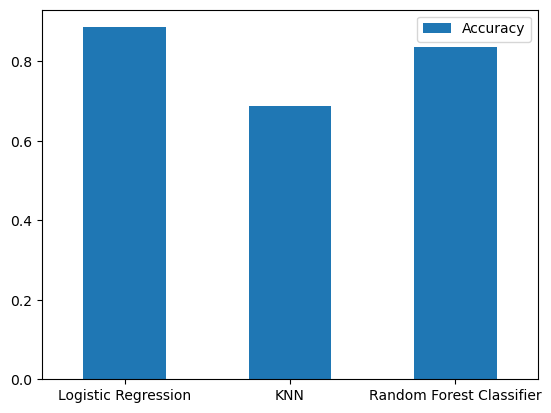

In [59]:
model_compare = pd.DataFrame(results_model , index= ["Accuracy"])
model_compare.T.plot(kind="bar")
plt.xticks(rotation=0);

Hyperparameters Tuning

In [60]:
#Lets tune KNN
train_score=[]
test_score=[]
neighbors = range(1,21)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test , y_test))
    

In [61]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Improved Model Accuracy:75.41%


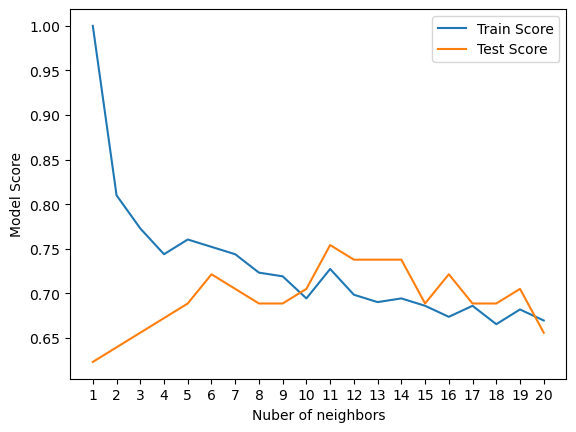

In [62]:
plt.plot(neighbors, train_score , label="Train Score")
plt.plot(neighbors ,test_score , label="Test Score")
plt.xlabel("Nuber of neighbors")
plt.xticks(np.arange(1,21,1))
plt.ylabel("Model Score")
plt.legend()
print(f"Improved Model Accuracy:{max(test_score)*100:.2f}%")

Hyperparameters tuning with RandomizedSearchCV


We're going to tune:

LogisticRegression()
RandomForestClassifier()

using RandomizedSearchCV


In [63]:
#Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver":["liblinear"]}

#Tune logisticRegression
np.random.seed(42)
#Setup random hyperparamter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter =20,
                                verbose=True)
#Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)
#
rs_log_reg.score(X_test , y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8852459016393442

In [64]:
results_model

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

In [65]:
#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,100,20),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}
#Tune RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
rs_rf.fit(X_train, y_train)
rs_rf.score(X_test, y_test)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8852459016393442

Hyperparameter tuning GridSearchCV

In [66]:
#Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
gs_log_reg.fit(X_train,y_train)
gs_log_reg.score(X_test,y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.8852459016393442

In [67]:
#Setup grid hyperparameter search for RandomForestClassifier
"""gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid=rf_grid,
                     cv=5,
                     verbose=True)
gs_rf.fit(X_train, y_train)
gs_rf.score(X_test,y_test)"""

'gs_rf = GridSearchCV(RandomForestClassifier(),\n                     param_grid=rf_grid,\n                     cv=5,\n                     verbose=True)\ngs_rf.fit(X_train, y_train)\ngs_rf.score(X_test,y_test)'

In [68]:
#Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

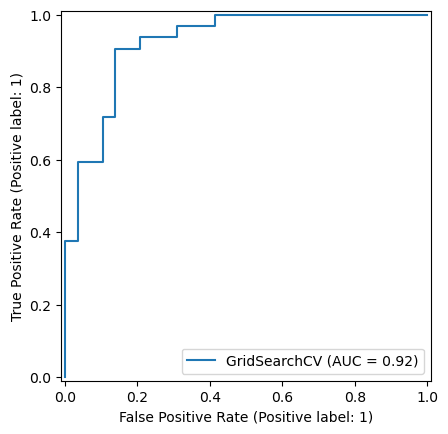

In [69]:
#Plot ROC Curve and calculate AUC metric
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(estimator=gs_log_reg,
                               X = X_test,
                               y= y_test);

In [70]:
print(confusion_matrix(y_test , y_preds))

[[25  4]
 [ 3 29]]


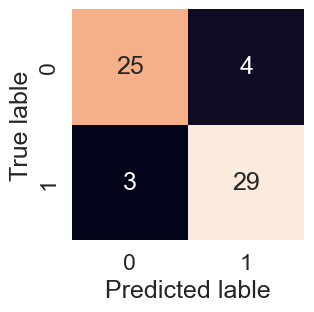

In [75]:
import seaborn as san
sns.set(font_scale=1.5)
def plt_conf_matrix(y_test , y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot= True,
                     cbar = False)
    plt.xlabel("Predicted lable")
    plt.ylabel("True lable")
    
plt_conf_matrix(y_test, y_preds)                         


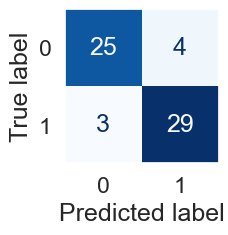

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_test , y_preds))
fig , ax =plt.subplots(figsize=(2,2))
disp.plot(cmap=plt.cm.Blues,ax=ax , colorbar= False , values_format = 'd')
ax.grid(False)


Now we've got a ROC curve, an AUC metric and a confusion matrix, lets get a classification report s well as cross-validated precision,recall and f1 score.

In [96]:
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Calculate evaluation metrics using cross-validation
We re going precision, recall and f1 score of our model using cross-validation and to do so we'll using cross_val_score

In [97]:
#Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [98]:
#Create a new classifier with best parameters
clf= LogisticRegression(C =  0.20433597178569418,
                        solver = "liblinear")

In [120]:
#Cross-validation accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc=cv_acc.mean()
cv_acc

0.8479781420765027

In [121]:
#Cross-validation precision
cv_prec = cross_val_score(clf,
                          X,
                          y,
                          cv=5,
                          scoring="precision")
cv_prec=cv_prec.mean()
cv_prec

0.8215873015873015

In [122]:
#Cross-validation recall
cv_recall = cross_val_score(clf,
                            X,
                            y,
                            cv=5,
                            scoring="recall")
cv_recall=cv_recall.mean()
cv_recall

0.9272727272727274

In [123]:
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1=cv_f1.mean()
cv_f1

0.8705403543192143

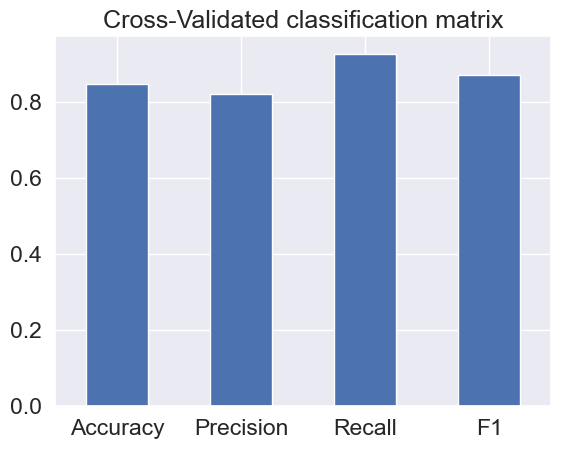

In [129]:
#Visualize cross-validation matrix
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision":cv_prec,
                           "Recall":cv_recall,
                           "F1":cv_f1},
                         index=[0])
cv_metrics.T.plot(kind="bar" , legend= False, title ="Cross-Validated classification matrix")
plt.xticks(rotation=0);

In [130]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [135]:
clf = LogisticRegression(C = 0.20433597178569418,
                         solver="liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [139]:
#coef_ coeffient of feature columns    // this show how each column participate for target column
clf.coef_  

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [141]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

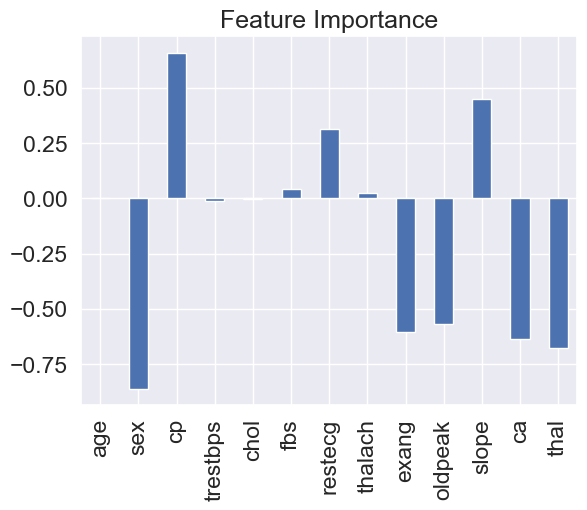

In [145]:
#Visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend= False);